# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [55]:
import pandas as pd
import numpy as py
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [22]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [23]:
print(sensor.head)



<bound method NDFrame.head of       attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0          1.528132       -0.733896      0.696372   0.741895   0.669768   
1          1.527992       -0.716987      0.677762   0.753099   0.657116   
2          1.527765       -0.706999      0.670951   0.759611   0.649555   
3          1.516768       -0.704678      0.675735   0.760709   0.647788   
4          1.493941       -0.703918      0.672994   0.760062   0.647210   
...             ...             ...           ...        ...        ...   
1746       1.797120       -0.562324      2.445889   0.824443   0.533154   
1747       1.814297       -0.569719      2.449655   0.817212   0.539396   
1748       1.830821       -0.578367      2.447967   0.809207   0.546658   
1749       1.849557       -0.586962      2.439458   0.800485   0.553834   
1750       1.869375       -0.596783      2.433775   0.790551   0.561984   

      gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0 

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [24]:
missing_data = sensor.isnull()

sensor_cleaned = sensor.dropna()

How many rows and columns are in our data?

In [25]:
# Your code here:
sensor.info


<bound method DataFrame.info of       attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0          1.528132       -0.733896      0.696372   0.741895   0.669768   
1          1.527992       -0.716987      0.677762   0.753099   0.657116   
2          1.527765       -0.706999      0.670951   0.759611   0.649555   
3          1.516768       -0.704678      0.675735   0.760709   0.647788   
4          1.493941       -0.703918      0.672994   0.760062   0.647210   
...             ...             ...           ...        ...        ...   
1746       1.797120       -0.562324      2.445889   0.824443   0.533154   
1747       1.814297       -0.569719      2.449655   0.817212   0.539396   
1748       1.830821       -0.578367      2.447967   0.809207   0.546658   
1749       1.849557       -0.586962      2.439458   0.800485   0.553834   
1750       1.869375       -0.596783      2.433775   0.790551   0.561984   

      gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [26]:
sensor.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z'],
      dtype='object')

In [27]:
sensor_index = pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:00:00 00:29:10", periods=len(sensor))
sensor.set_index(sensor_index, inplace=True)
                     

Assign the time series index to the dataframe's index.

In [28]:
sensor.index.freq = pd.infer_freq(sensor.index)

sensor.head(1)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.77818,1.082764,0.294894,-0.184493,0.377542


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

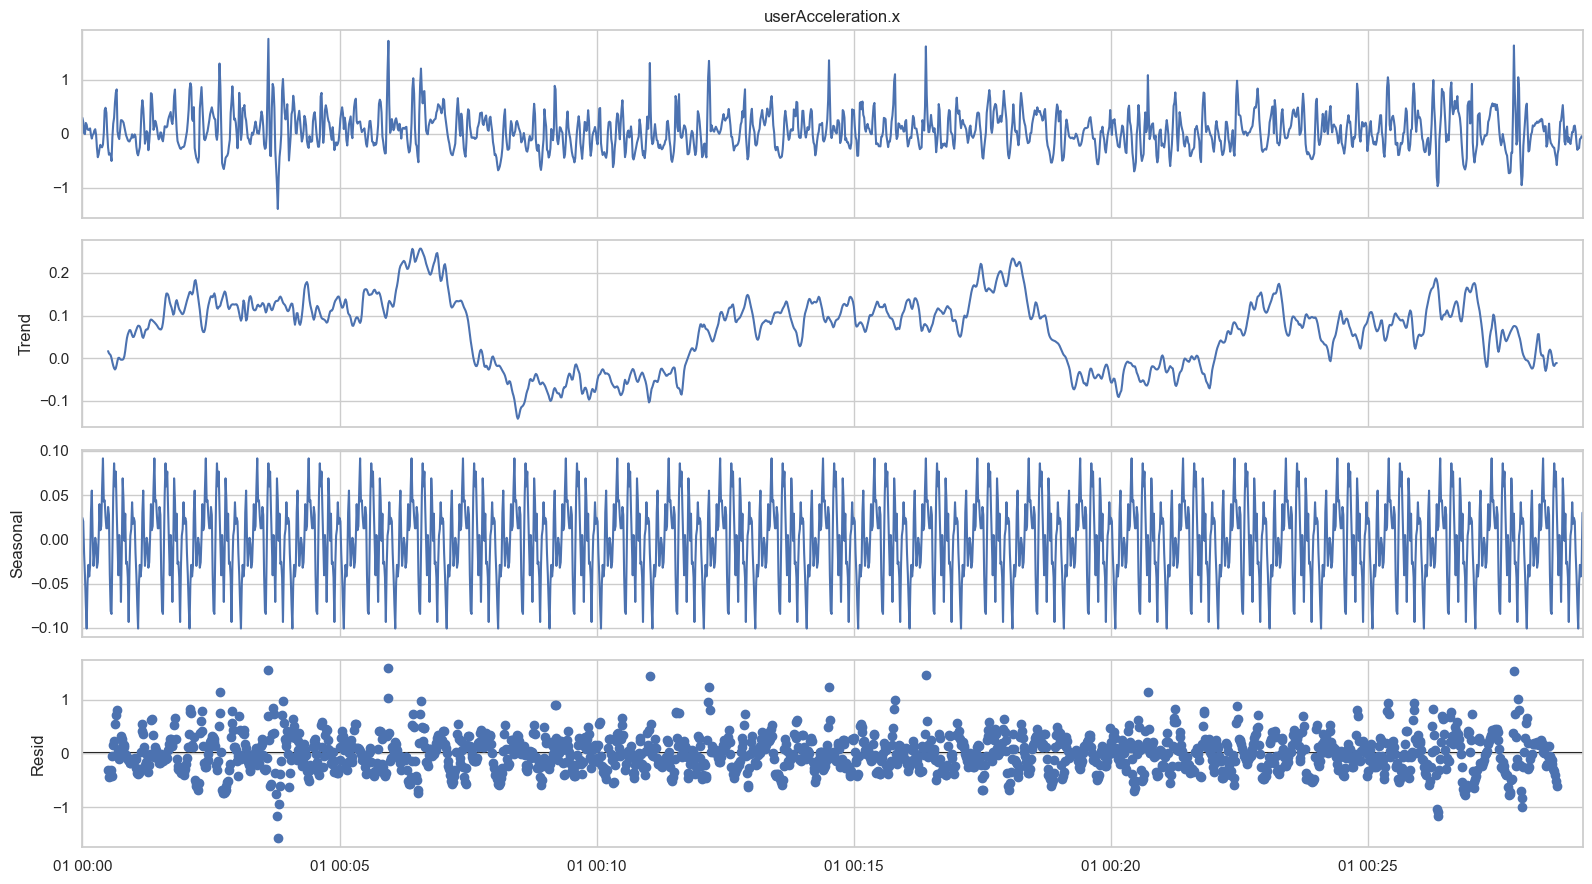

In [35]:

time_acc = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"], model="additive", period=60)

time_acc.plot();




Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

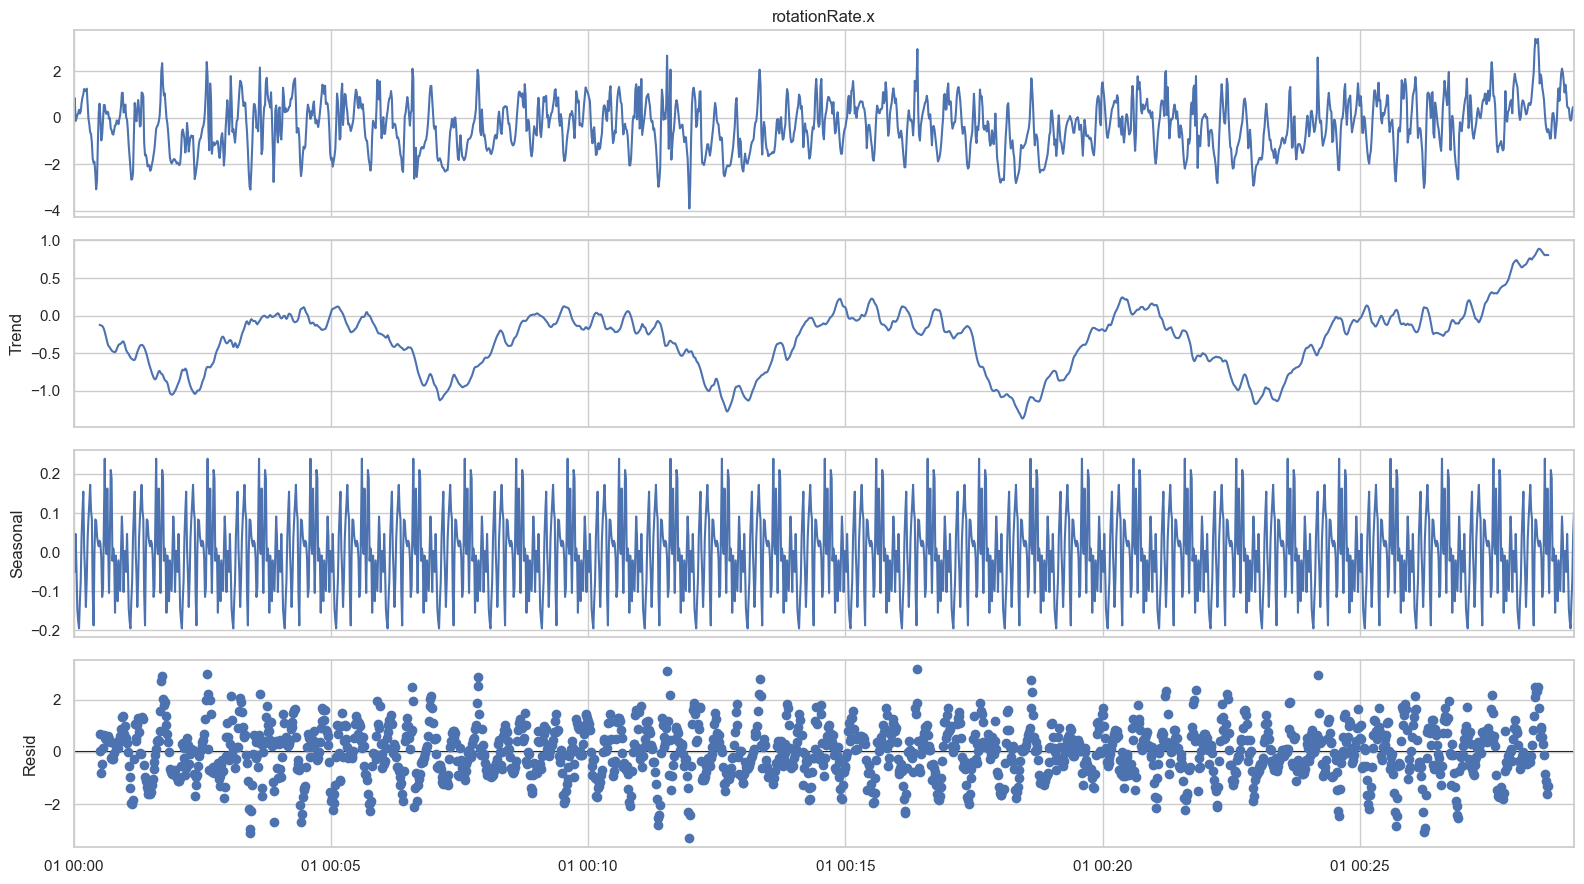

In [36]:
time_rot = sm.tsa.seasonal_decompose(sensor["rotationRate.x"], model="additive", period=60)

time_rot.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

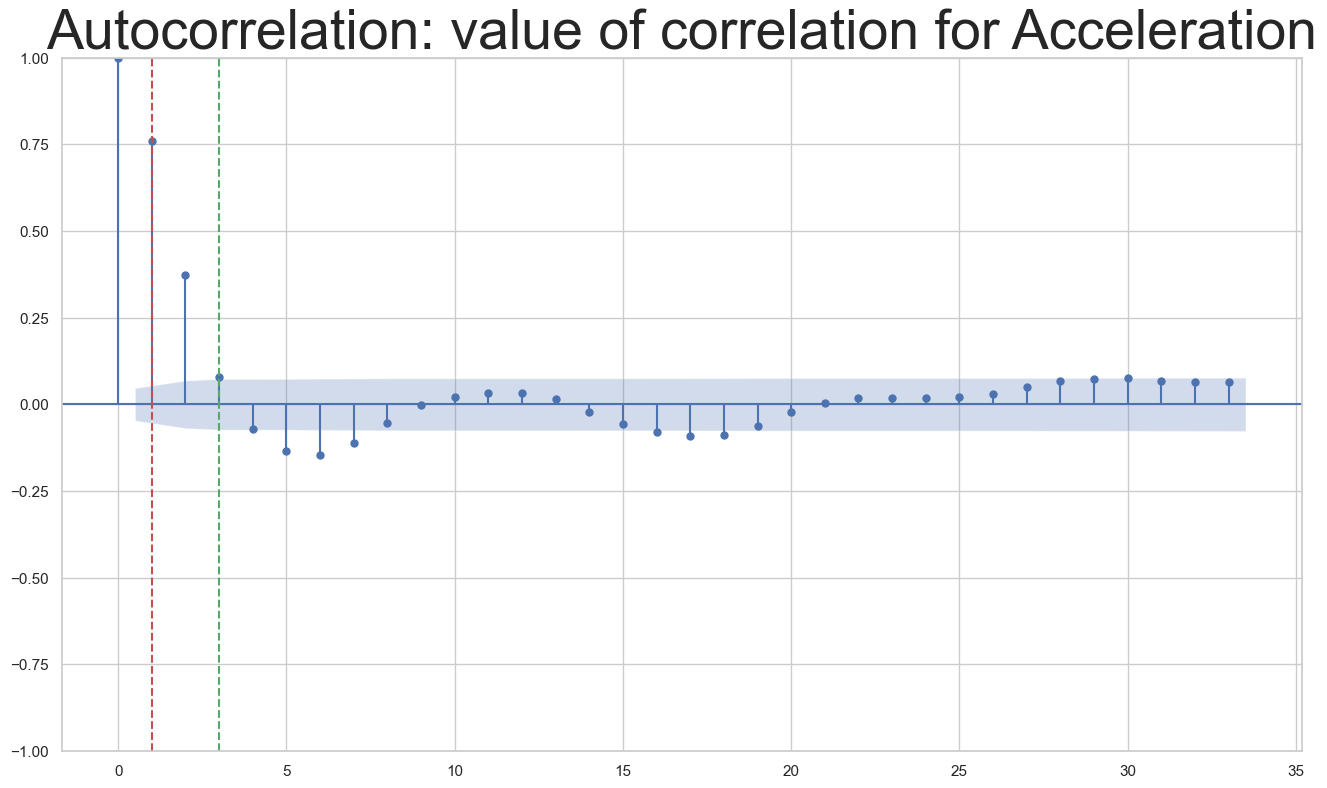

In [49]:
plot_acf(sensor["userAcceleration.x"]);
plt.title("Autocorrelation: value of correlation for Acceleration", size=40)
plt.axvline(x=1, c="r", linestyle="--")
plt.axvline(x=3, c="g", linestyle="--");




Create a lag plot for `rotationRate.x`

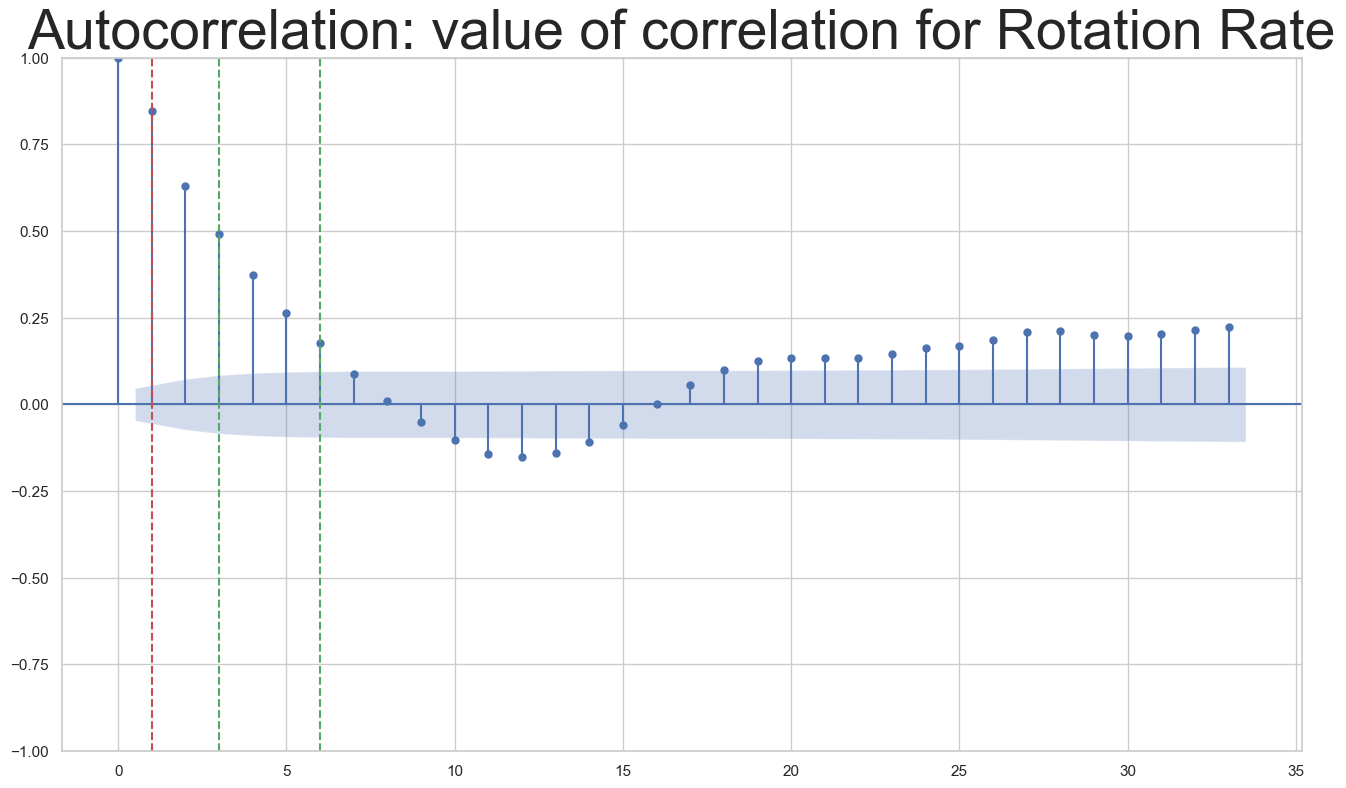

In [50]:
plot_acf(sensor["rotationRate.x"]);
plt.title("Autocorrelation: value of correlation for Rotation Rate", size=40)
plt.axvline(x=1, c="r", linestyle="--")
plt.axvline(x=3, c="g", linestyle="--")
plt.axvline(x=6, c="g", linestyle="--");

What are your conclusions from both visualizations?

In [20]:
# Acceleration correlation is high in line 1 but drops quickly in the 3rd line.
# Suggest quick and fast changes across the data ? high pikcs and deep valleys ?

# Rotation correlation is more steady but suggest a pattern as comes up again in
# line 20 ? 

# Both looks like seasonal patterns


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [62]:
def dickey_rejects (series, alpha = 0.05):
    
    p_value = adfuller(series)[1]
    print(p_value)
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"
        

In [63]:
dickey_rejects(sensor["rotationRate.x"])

6.320230335912861e-06


'We reject H0 and accept H1: The series IS stationary'

In [64]:
dickey_rejects(sensor["userAcceleration.x"])

2.823439483037483e-30


'We reject H0 and accept H1: The series IS stationary'

What are your conclusions from this test?

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [23]:
order = (2, 0, 1)

In [24]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [25]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html



In [26]:
# 2. Fit the model:



In [27]:
# 3. Predict: create y_pred:


In [28]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

NameError: name 'plt' is not defined

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:

# rmse(y_pred, y_test)